In [1]:
from pandasgui import show
import pandas as pd
import matplotlib.pyplot as plt

figure_path = r"C:\Users\lucas\OneDrive - Yale University\2nd year paper\Procurement\figures"
root_path = r"C:\Users\lucas\OneDrive - Yale University\2nd year paper\Procurement\raw_data"
data_path = r"C:\Users\lucas\OneDrive - Yale University\2nd year paper\Procurement\data"
df = pd.read_csv(root_path + r"\Licitaciones\2022-1\lic_2022-1.csv", encoding='latin1', sep=';') 
df

show(df)

C:\Users\lucas\AppData\Local\Temp\ipykernel_7740\1954001689.py:8: DtypeWarning: Columns (63,87,97,101) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(root_path + r"\Licitaciones\2022-1\lic_2022-1.csv", encoding='latin1', sep=';')
PandasGUI INFO — pandasgui.gui — Opening PandasGUI


: 

In [3]:
# codigo is not unique 
is_unique = not df['Codigo'].duplicated().any()
print(is_unique)

 

False


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

list(df.columns)

['Codigo',
 'Link',
 'CodigoExterno',
 'Nombre',
 'Descripcion',
 'Tipo de Adquisicion',
 'CodigoEstado',
 'Estado',
 'CodigoOrganismo',
 'NombreOrganismo',
 'sector',
 'RutUnidad',
 'CodigoUnidad',
 'NombreUnidad',
 'DireccionUnidad',
 'ComunaUnidad',
 'RegionUnidad',
 'Informada',
 'CodigoTipo',
 'Tipo',
 'TipoConvocatoria',
 'CodigoMoneda',
 'Moneda Adquisicion',
 'Etapas',
 'EstadoEtapas',
 'TomaRazon',
 'EstadoPublicidadOfertas',
 'JustificacionPublicidad',
 'EstadoCS',
 'Contrato',
 'Obras',
 'CantidadReclamos',
 'FechaCreacion',
 'FechaCierre',
 'FechaInicio',
 'FechaFinal',
 'FechaPubRespuestas',
 'FechaActoAperturaTecnica',
 'FechaActoAperturaEconomica',
 'FechaPublicacion',
 'FechaAdjudicacion',
 'FechaEstimadaAdjudicacion',
 'FechaSoporteFisico',
 'FechaTiempoEvaluacion',
 'UnidadTiempoEvaluacion',
 'FechaEstimadaFirma',
 'FechasUsuario',
 'FechaVisitaTerreno',
 'DireccionVisita',
 'FechaEntregaAntecedentes',
 'DireccionEntrega',
 'Estimacion',
 'FuenteFinanciamiento',
 'Vis

In [6]:
# Define the list of column names
columns = ['sector', 'NombreUnidad', 'RegionUnidad', 'CodigoTipo', 'CodigoEstado' ]

# Iterate over the columns
for column in columns:
    # Display the unique values and their frequencies for the column
    column_counts = df[column].value_counts()
    print(f"{column} tab")
    print(column_counts)
    print("") # Add a blank line for spacing 


sector tab
sector
Municipalidades                78365
Salud                          38813
Gob. Central, Universidades    12494
FFAA                            5960
Otros                           1574
Obras Públicas                   459
Legislativo y judicial           290
Name: count, dtype: int64

NombreUnidad tab
NombreUnidad
Bienes y Servicios                                    9349
Salud                                                 8365
Departamento de Salud                                 5783
COMPLEJO ASISTENCIAL DR. SOTERO DEL RIO               3485
SALUD                                                 3027
                                                      ... 
Aeropuerto Arturo Merino Benítez                         1
Servicio de Salud del Reloncaví                          1
Hospital de Queilen                                      1
Operaciones, Medio Ambiente, Aseo y Ornato               1
CENTRO DE FORMACION TECNICA DE LA REGION DE ATACAM       1
Name: count, Leng

In [7]:
# Define the list of column names
vars = ['CodigoEstado', 'Tipo de Adquisicion','Informada','Tipo', 'CodigoTipo']

# Iterate over the columns
for var in vars:
    # Display the unique values and their frequencies for the column
    column_counts = df[var].value_counts()
    print(f"{var} tab")
    print(column_counts)
    print("") # Add a blank line for spacing 

# Define the list of column names
vars2 = ['TipoConvocatoria']

# Iterate over the columns
for var in vars2:
    # Display the unique values and their frequencies for the column
    column_counts = df[var].value_counts()
    print(f"{var} tab")
    print(column_counts)
    print("") # Add a blank line for spacing 


CodigoEstado tab
CodigoEstado
8     120246
9       6712
7       6498
15      2991
6       1436
13        39
14        29
16         4
Name: count, dtype: int64

Tipo de Adquisicion tab
Tipo de Adquisicion
Licitación Pública Entre 100 y 1000 UTM (LE)                   63270
Licitación Pública Menor a 100 UTM (L1)                        38111
Licitación Pública entre a 2000 y 5000 UTM (LQ)                16705
Licitación Pública Mayor 1000 UTM (LP)                         10245
Licitación Pública Mayor a 5000 (LR)                            9423
Licitación Privada entre 100 y 1000 UTM.                          89
Licitación Pública MOP (O1)                                       75
Licitación Privada Menor a 100 UTM.                               21
Licitación Privada Mayor a 1000 UTM                                5
Licitación Privada entre a 2000 y 5000 UTM (H2)                    5
Licitación Pública Servicios personales especializados (LS)        3
Licitación Privada Mayor a 5000 (I2)

In [8]:
    # Tabulate the joint distribution of CodigoEstado and Estado
    joint_distribution = df.groupby(['CodigoEstado', 'Estado']).size().reset_index(name='count')
    print(joint_distribution)

   CodigoEstado                              Estado   count
0             6                             Cerrada    1436
1             7  Desierta (o art. 3 ó 9 Ley 19.886)    6498
2             8                          Adjudicada  120246
3             9                          Adjudicada    6712
4            13                             Cerrada      39
5            14                             Cerrada      29
6            15                            Revocada    2991
7            16                          Suspendida       4


In [9]:
# Define the list of column names
vars = ['TipoPago']

# Iterate over the columns
for var in vars:
    # Display the unique values and their frequencies for the column
    column_counts = df[var].value_counts()
    print(f"{var} tab")
    print(column_counts)
    print("") # Add a blank line for spacing 
 

TipoPago tab
TipoPago
 4    49689
 1    45661
-1    22898
 2    19707
Name: count, dtype: int64



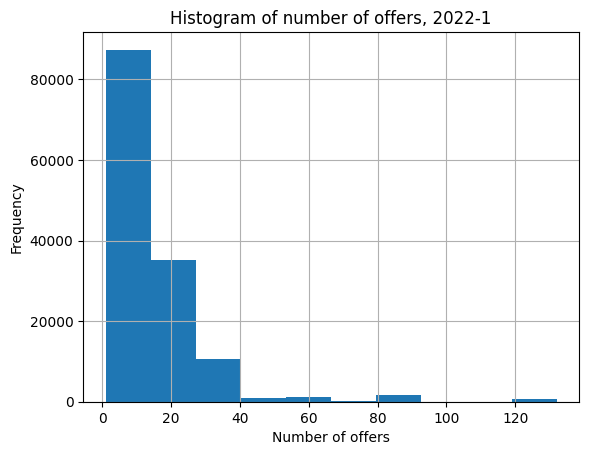

In [10]:
 
df['NumeroOferentes'].hist()
plt.title('Histogram of number of offers, 2022-1')
plt.xlabel('Number of offers')
plt.ylabel('Frequency')
plt.savefig(figure_path + r'\22_offers_hist.png')



df['MontoEstimado'] = pd.to_numeric(df['MontoEstimado'], errors='coerce').fillna(-1).astype(int)
df['Monto Estimado Adjudicado'] = pd.to_numeric(df['Monto Estimado Adjudicado'], errors='coerce').fillna(-1).astype(int)


Correlation: 0.8043236631113226


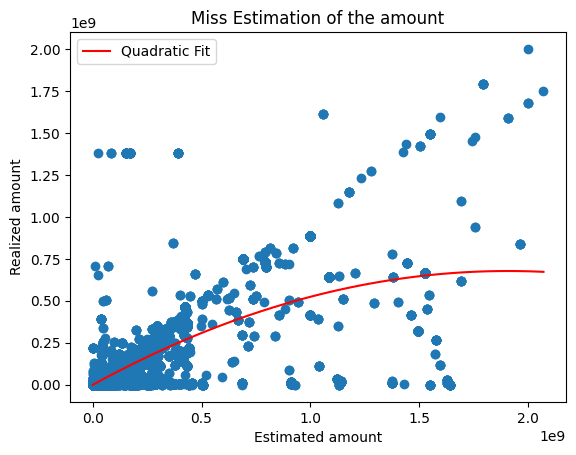

In [11]:

# Exclude observations where either 'Monto Estimado Adjudicado' or 'MontoEstimado' is -1
filtered_df = df[(df['Monto Estimado Adjudicado'] >= 0) & (df['MontoEstimado'] >= 0)]

# Calculate the correlation between 'Monto Estimado Adjudicado' and 'MontoEstimado'
correlation = filtered_df['Monto Estimado Adjudicado'].corr(filtered_df['MontoEstimado'])
print(f"Correlation: {correlation}")
import numpy as np

# Plot the joint distribution with quadratic fit
y = filtered_df['Monto Estimado Adjudicado']
x = filtered_df['MontoEstimado']



# Fit a quadratic curve
coefficients = np.polyfit(x, y, 2)
curve_x = np.linspace(x.min(), x.max(), 100)
curve_y = np.polyval(coefficients, curve_x)

# Plot the scatter plot and quadratic curve
plt.scatter(x, y)
plt.plot(curve_x, curve_y, color='red', label='Quadratic Fit')
plt.ylabel('Realized amount')
plt.xlabel('Estimated amount')
plt.title('Miss Estimation of the amount')
plt.legend()
plt.savefig(figure_path + r'\22_estimatedvsrealizedamount.png')
plt.show()

plt.close()


In [12]:
df['over_pay'] = df['Monto Estimado Adjudicado'] / df['MontoEstimado']

from sklearn.linear_model import LinearRegression

# Define the predictors
predictors = ['NumeroOferentes',     'CantidadReclamos']

# Create the feature matrix X
X = pd.get_dummies(df['Tipo de Adquisicion'], drop_first=True)
X = pd.concat([X, df[predictors]], axis=1)

# Create the target variable y
y = df['over_pay']

# Create an instance of the Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the coefficients
coefficients = model.coef_

# Print the coefficients
# Print the coefficients of the variables in the list predictors
print(coefficients[len(X.columns)-len(predictors):])

[156347.24557135   2846.16409566]


In [21]:
df.to_csv(data_path + r"\lic_2022-1.csv", index=False)

df.to_excel(data_path + r"\lic_2022-1.xlsx", index=False)

IllegalCharacterError: El Servicio Local de Educación Pública Puerto Cordillera  en adelante SLEP Puerto Cordillerallama a presentar ofertas para contratar el SERVICIO DE SISTEMA DE GESTIÓN 
PEDAGÓGICA PARA EL MEJORAMIENTO DE PROCESOS Y RESULTADOS EDUCATIVOS 
EN ESTABLECIMIENTOS EDUCACIONALES DE SU DEPENDENCIA cannot be used in worksheets.

In [22]:
import re


# Function to remove non-printable characters
def remove_non_printable(text):
    if isinstance(text, str):
        return re.sub(r'[\x00-\x1F\x7F-\x9F]', '', text)
    return text

# Apply the function to all string columns in the DataFrame
df = df.applymap(remove_non_printable)

# Export the cleaned DataFrame to an Excel file
df.to_excel(data_path + '\\lic_2022-1.xlsx', index=False)

In [1]:
import re
import pandas as pd


# Function to remove non-printable characters
def remove_non_printable(text):
    if isinstance(text, str):
        return re.sub(r'[\x00-\x1F\x7F-\x9F]', '', text)
    return text

# Apply the function to all string columns in the DataFrame using vectorized operations
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].apply(remove_non_printable)

df.to_excel(data_path + '\\lic_2022-1.xlsx', index=False)

KeyboardInterrupt: 